## Default specs and levels

In [1]:
specialisations = ["c++","php","python flask","rust","python django", 
                   "golang", "java", "solidity blockchain", "unity3d c#",
                   "ruby","data scientist","node.js backend","c# asp.net",
                   "golang blockchain"]
levels = ["junior","middle","senior"]

In [2]:
import pandas as pd
import numpy as np
import os.path
specialisation_variations = []

df = pd.DataFrame()

for spec in specialisations:
    for level in levels:
        spec_pair = spec+" "+level
        file_name = spec_pair+".csv"
        
        series = pd.Series()        
        if os.path.isfile("csv/"+file_name):
            series = pd.read_csv("csv/"+file_name, encoding="utf8" )["salary"]
        series.name = spec_pair
        series = pd.to_numeric(series, errors = "coerce").dropna()
        
        new_index = list(range(max([len(df),len(series)])))        
        df = df.reindex(new_index, fill_value=np.NaN)
        df = df.join(series)

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

def compare_by_level(specialisations = specialisations,
                     ignore_scpecialisation = None, level="junior"):
    plt.title('Boxplot of salaries. Level: '+level)
    plt.xticks(rotation='vertical')
    specs = [sp+" "+level for sp in specialisations if sp not in (ignore_scpecialisation or [])]
    sns.boxplot(data = df[specs], showfliers=False)    

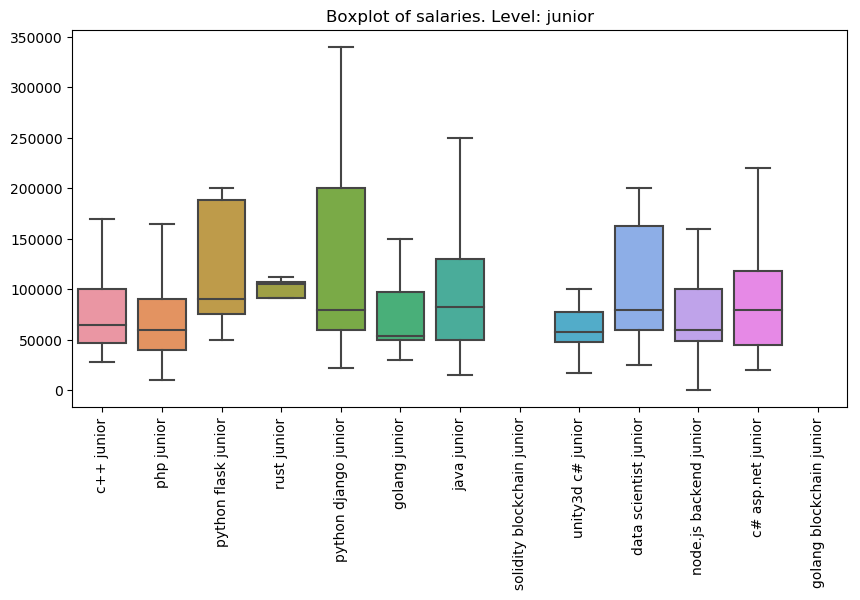

In [4]:
fz = plt.figure(figsize=(10, 5), dpi=100)
fz.add_subplot(1,1,1)
compare_by_level (ignore_scpecialisation = ["ruby"],
                  level="junior")

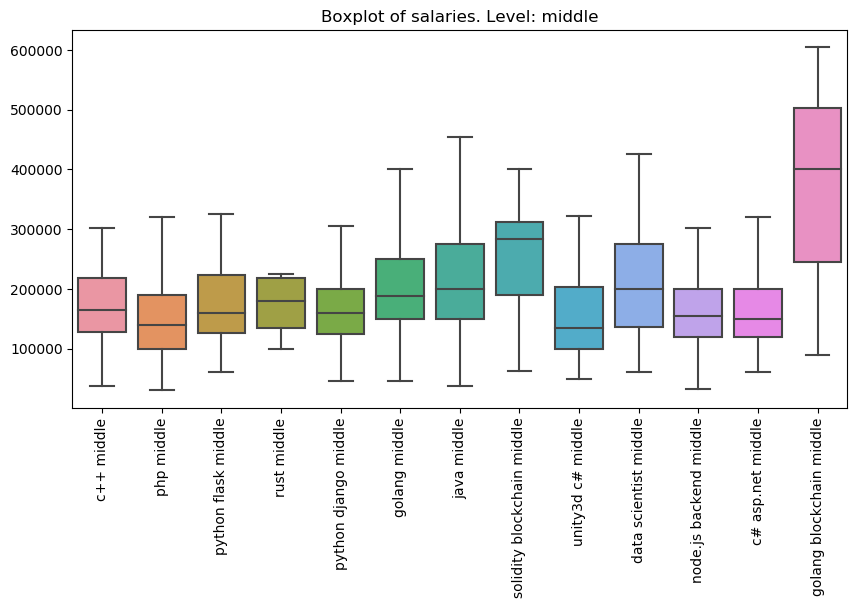

In [5]:
fz = plt.figure(figsize=(10, 5), dpi=100)
fz.add_subplot(1,1,1)
compare_by_level (ignore_scpecialisation = ["ruby"],
                  level="middle")

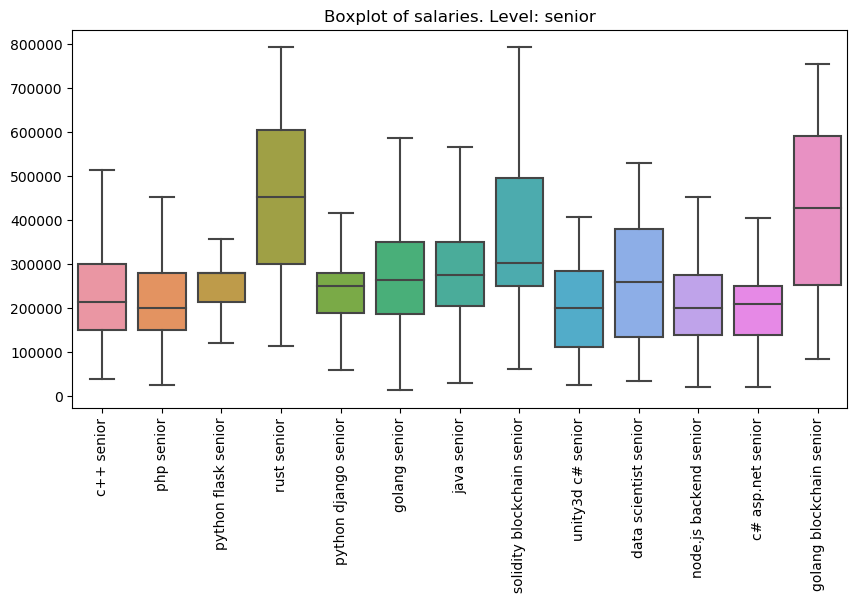

In [6]:
fz = plt.figure(figsize=(10, 5), dpi=100)
fz.add_subplot(1,1,1)
compare_by_level (ignore_scpecialisation = ["ruby"],
                  level="senior")

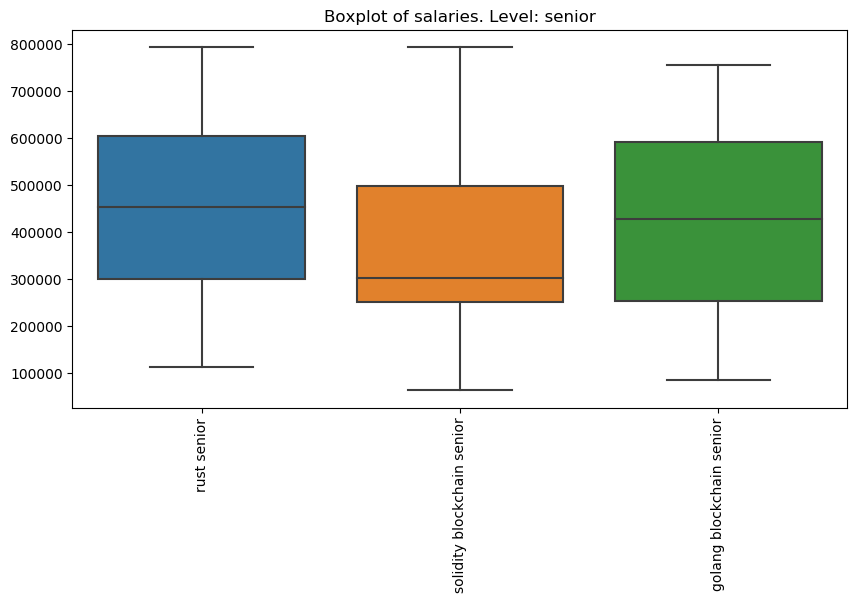

In [7]:
fz = plt.figure(figsize=(10, 5), dpi=100)
fz.add_subplot(1,1,1)
compare_by_level (specialisations=["rust","solidity blockchain","golang blockchain"], level="senior")

In [8]:
! git status


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   main.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	compare.ipynb
	reports/

no changes added to commit (use "git add" and/or "git commit -a")
